# Analytical Approach to Derive Posterior Distribution

In this hands-on session, you will visually check the posterior distribution based on the Analytical Approach. Remember that when the prior is Beta or Gamma, the posterior distribution has a closed-form solution, and is also Beta or Gamma, respectively. We will use the `scipy.stats` module to plot the posterior distribution.

<div class="alert alert-success">
<h3>Case of Beta prior and Bernoulli likelihood</h3>

Here we are interested in the posterior distribution of $\theta$ given the evidence from data and the prior distribution of $\theta$. The posterior distribution is proportional to the product of the likelihood and the prior. If the data is generated based on a `Bernoulli` random variable with parameter $\theta$, the prior distribution of $\theta$ is a `Beta`, then the posterior distribution of $\theta$ follows a `Beta` too.

Let's start by importing the necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

<div class="alert alert-success">
<h5>Prior distribution as a Beta distribution</h5>

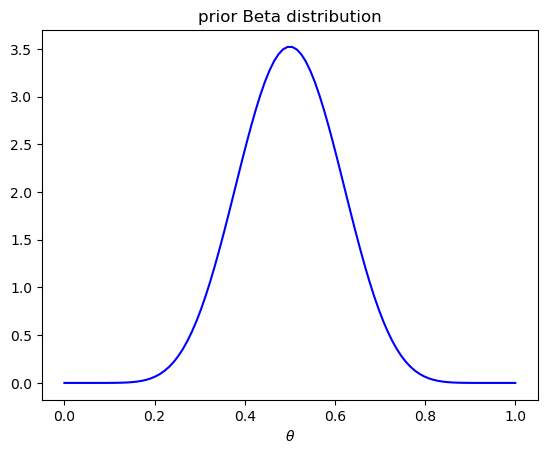

In [72]:
# set the parameters (a0>0, b0>0)
a0, b0 = 10,10

# plot probability distribution
x = np.linspace(0,1,100)

plt.plot(x, beta.pdf(x, a0,b0), 'b-')
plt.xlabel(r'$\theta$')
plt.title('prior Beta distribution')

plt.show()

<div class="alert alert-info">
<h4>Task 1</h4>

Let's vary the parameters and see how the distribution changes. 

1. As an example, suppose that $\theta$ is the probability of head in fliping a fair coin. Our prior knowledge implies that the coin is fair. Change the parameters `a0, b0` until you get a distribution that best describes our prior belief. 

2. As an another example, suppose that $\theta$ is the probability a person clicking on an ad. Our prior knowledge about this probability is poor because this is the first time we are running this campaign. So, any probability between 0 and 1 is equally likely. Change the parameters `a0, b0` until you get a distribution that best describes our prior belief. 

3. Following the previous example, suppose that by experience we know that the probability of clicking on an ad is between 0.1 and 0.2. Change the parameters `a0, b0` until you get a distribution that best describes our prior belief.

4. Set `a0 = 1000, b0 = 1000` and plot the prior. Based on the plot, argue whether the prior is informative or not.
<br>
</div>

<div class="alert alert-success">
<h5>Likelihood as a Bernoulli distribution</h5>

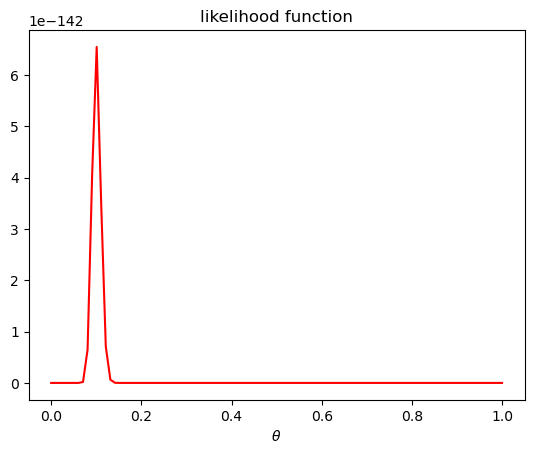

In [58]:
# N is the number of trials, and n_success is the number of successes
N, n_success = 1000, 100
plt.plot(x, x**n_success * (1-x)**(N-n_success), 'r')

plt.xlabel(r'$\theta$')
plt.title('likelihood function')
plt.show()

<div class="alert alert-info">
<h4>Task 2</h4>

Let's vary the parameters and see how the distribution changes. 

1. Consider again the example of fliping a coin where $\theta$ is the probability of head. with `N=10` trials, what does `n_success` should be to consider the coin a fair one? Is the shape of the likelihood in line with your expectation?

<br>
</div>

<div class="alert alert-success">
<h5>Posterior distribution as a Beta distribution</h5>

115 1000


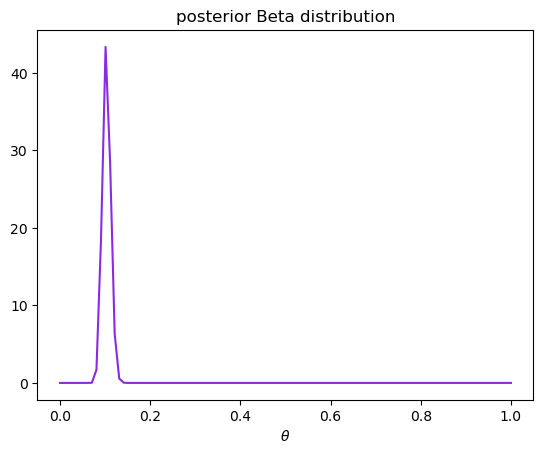

In [59]:
# write the parameters based on the theory
a, b = a0 + n_success, N - n_success + b0
print(a,b)

plt.plot(x, beta.pdf(x, a, b), 'blueviolet')
plt.title('posterior Beta distribution')
plt.xlabel(r'$\theta$')
plt.show()

Let's put all the three plots together in a single figure.

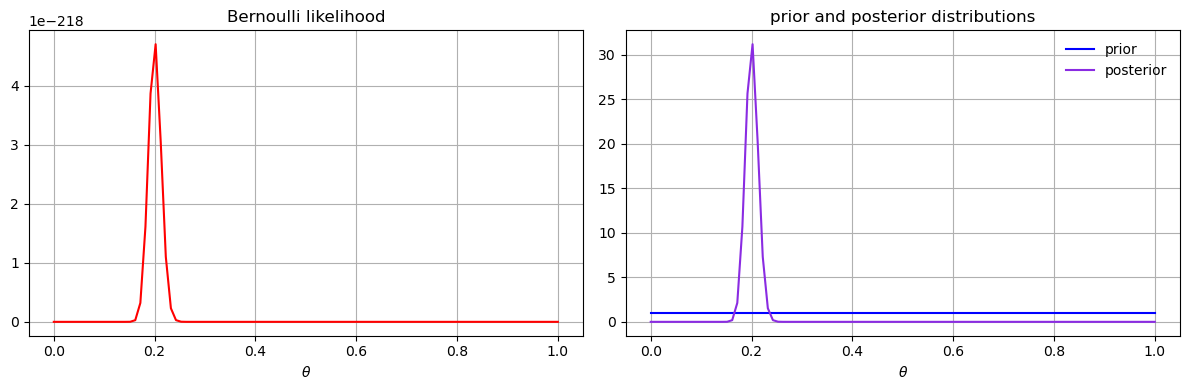

In [143]:
# create all plots in a row
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# set the parameters (a>0, b>0, N>=n_success>0)
a, b = 1, 1
N = 1000
n_success = 200

# create a grid of theta values
theta = np.linspace(0,1,100)

# plot Bernoulli likelihood
axes[0].plot(theta, theta**n_success * (1-theta)**(N-n_success), 'r')

axes[0].set_xlabel(r'$\theta$')
axes[0].set_title('Bernoulli likelihood')
axes[0].grid()

# plot probability distribution
axes[1].plot(theta, beta.pdf(theta, a,b), 'b-', label='prior')
axes[1].plot(theta, beta.pdf(theta, a+n_success, b+N-n_success), 'blueviolet', label='posterior')

axes[1].set_xlabel(r'$\theta$')
axes[1].set_title('prior and posterior distributions')
axes[1].legend(loc='best', frameon=False)
axes[1].grid()

plt.tight_layout()
plt.show()

<div class="alert alert-info">
<h4>Task 3</h4>

Observe how the posterior distribution changes with the prior and likelihood. 

1. Fix `a = 1000, b = 1000` so that you get a strong prior. According to this prior you strongy believe that the coin is fair, i.e. about half of the times you should get a head. Now, you flip the coin 10 times and observe only 2 heads. What is your posterior belief about the fairness of the coin?

2. In the previous case, the sample size of 10 probably didn't change your prior belief. Now, increase the sample size to 1000 while keeping the same success rate. What is your posterior belief about the fairness of the coin?

3. Repeat the same experiment but with 10000 trials now and 2000 successes. Do you still believe that the coin is fair?

4. Suppose that you have sent a robot on a newly discovered planet to collect soil samples. You have no prior knowledge about the soil composition of the planet and whether they are rich in iron or not. The robot collects 10 samples and finds that 2 of them are rich in iron. Setup the prior and likelihood parameters based on this information, run the code and discuss the outcome. What is your posterior belief about the soil composition of the planet? In particular, was the 10 samples enough to change your prior belief?

5. Based on your findings in the questions above, discuss the effect of the sample size on the posterior distribution.


<br>
</div>

<div class="alert alert-secondary">
<h2>Optional Task</h2>

<div class="alert alert-success">
<h3>Case of Gamma prior and Exponential likelihood</h3>

Similar to the Beta distribution which is conjugate to the Bernoulli distribution, the Gamma distribution is conjugate to the Exponential distribution. This means that if we have a Gamma prior distribution and we observe data from a Exponential distribution, then the posterior distribution is also a Gamma distribution. This is a very useful property, because it means that we can update our beliefs about the parameters of a Gamma distribution in a closed-form way. 

Suppose that a number of visitors have visited an exhibition and made donations. Let's assume that the donation amount is exponentially distributed with rate $\lambda$. If we assume that the prior distribution of $\lambda$ is a `Gamma`, then luckily the posterior distribution of $\lambda$ is also `Gamma`.

Start by importing the `gamma` function from the `scipy.stats` module.

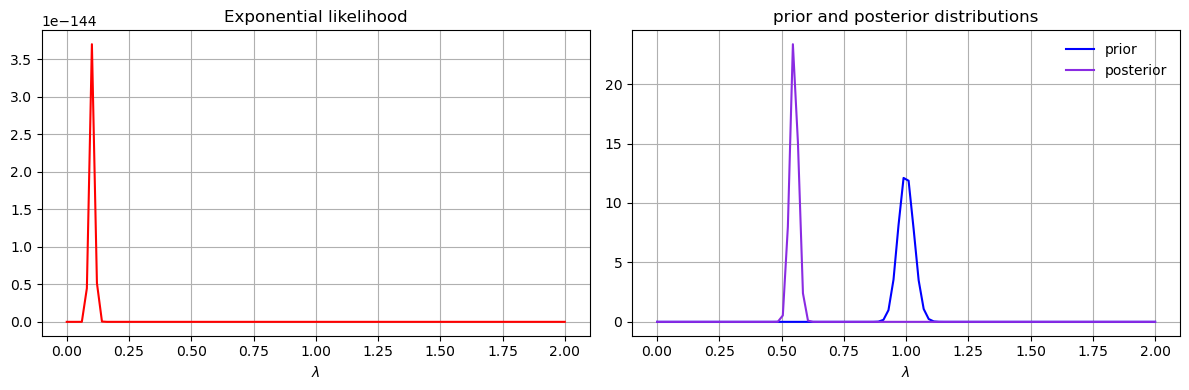

In [183]:
# create the prior, likelihood and posterior Gamma distributions in one row of plots
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# set the parameters of the prior (a>0, b>0)
a, b = 1000, 1000

# set the parameters of the likelihood 
# number of payers and total pay
n_payers, total_pay = 100, 1000

# create a grid of lambda values
lamda = np.linspace(0, 2, 100)

# plot exponential likelihood
axes[0].plot(lamda, (lamda**n_payers) * np.exp(-lamda*total_pay) , 'r')

axes[0].set_xlabel(r'$\lambda$')
axes[0].set_title('Exponential likelihood')
axes[0].grid()

# plot probability distribution
axes[1].plot(lamda, gamma.pdf(lamda, a=a, scale=1/b), 'b', label='prior')
axes[1].plot(lamda, gamma.pdf(lamda, a=a+n_payers, scale=1/(b+total_pay)), 'blueviolet', label='posterior')

axes[1].set_xlabel(r'$\lambda$')
axes[1].set_title('prior and posterior distributions')
axes[1].legend(loc='best', frameon=False)
axes[1].grid()

plt.tight_layout()
plt.show()


<div class="alert alert-info">
<h4>Task 1</h4>

Observe how the posterior distribution changes with the prior and likelihood. 

1. Fix `a = 1000, b = 1000` so that you get a strong prior. Because from previous exhibitions you know that on average each visitor donates \$1. Just recently, you got 10 new visitors and recieved a sum of \$100. So on average each visitor donated \$10. This is on average 10 times more than what you have recieved from previous exhibitions. What is your posterior belief about the average donation amount? did the 10 new visitors change your prior belief?

2. In the previous case, the sample size of 10 probably didn't change your prior belief much. Now, increase the sample size to 100 while keeping the same average donation per person. What is your posterior belief about the fairness of the coin?

3. Based on your findings in the questions above, discuss the effect of the sample size on the posterior distribution.


<br>
</div>